In [19]:
import os 
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
city="cph"
base_dir = os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))
print(base_dir)
# Paths for the Population Data --------------------------------------------------------------
#path to ancillary data folder
bbr_folder_path = base_dir + "/data_prep/{}_ProjectData/bbr".format(city)
ancillary_POPdata_folder_path = base_dir + "/data_prep/{}_ProjectData/PopData".format(city)
#cor_path= base_dir + "/data_prep/{}_data_scripts_pop/correlations/corImages".format(city)
image_path= base_dir + "/data_prep/{}_Projectdata/Visualizations/images".format(city)
years_list=[2004,2006,2008,2010,2012,2014,2016,2018,2020] 

BBRtype= "culture"

c:\FUME\PopNetV2


In [21]:
dfPath =  os.path.dirname(bbr_folder_path) + "/temp_shp/{0}_{1}/2002_{1}.gpkg".format(city,BBRtype)
df = gpd.read_file(dfPath)
df = df[df["2002_{0}".format(BBRtype)] > 0]

In [22]:
ndf = df.copy()
for year in years_list:
    csPath =  os.path.dirname(bbr_folder_path) + "/temp_shp/{0}_{2}/{1}_{2}.gpkg".format(city,year,BBRtype)
    cs = gpd.read_file(csPath)
    cs = cs[cs["{0}_{1}".format(year,BBRtype)] > 0]
    ndf = ndf.merge(cs, left_on='id', right_on='id')

In [23]:
ndf = ndf[["2002_{0}".format(BBRtype),"2004_{0}".format(BBRtype),"2006_{0}".format(BBRtype),"2008_{0}".format(BBRtype),"2010_{0}".format(BBRtype), 
"2012_{0}".format(BBRtype), "2014_{0}".format(BBRtype), "2016_{0}".format(BBRtype), "2018_{0}".format(BBRtype),"2020_{0}".format(BBRtype)]]

In [24]:
ndf= ndf.rename(columns={"2002_{0}".format(BBRtype): "2002", "2004_{0}".format(BBRtype): "2004", "2006_{0}".format(BBRtype): "2006", "2008_{0}".format(BBRtype): "2008", 
"2010_{0}".format(BBRtype): "2010", "2012_{0}".format(BBRtype): "2012", "2014_{0}".format(BBRtype): "2014",
"2016_{0}".format(BBRtype): "2016", "2018_{0}".format(BBRtype): "2018", "2020_{0}".format(BBRtype): "2020"})

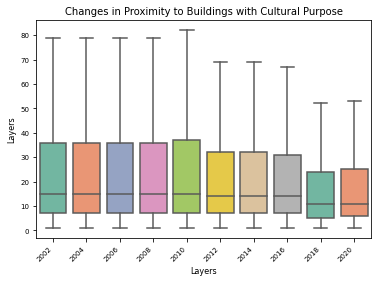

In [26]:
ax = sns.boxplot(x="variable", y="value", data=pd.melt(ndf), palette="Set2",  showfliers = False)
#plt.title("Changes in Mean House Prices",fontsize=10)
plt.title("Changes in Proximity to Buildings with Cultural Purpose",fontsize=10)
plt.xlabel("Layers", fontsize=8)
plt.ylabel("Layers", fontsize=8)
plt.xticks(fontsize=7, rotation=45, ha='right')
plt.yticks(fontsize=7, rotation=0)
plt.savefig(image_path + "/changesCulture_bplot.png", dpi=300)
plt.show()